
 ****** Running generation 0 ****** 

Population's average fitness: -0.24816 stdev: 0.16400
Best fitness: 0.10488 - size: (2, 4) - species 1 - id 2801
Average adjusted fitness: 0.155
Mean genetic distance 1.605, standard deviation 0.489
Population of 2999 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0  1242     -0.3    0.162     0
     2    0   514     -0.2    0.224     0
     3    0   238     -0.4    0.053     0
     4    0   432     -0.2    0.222     0
     5    0    43     -0.4    0.008     0
     6    0   403     -0.1    0.334     0
     7    0   115     -0.3    0.086     0
     8    0     1       --       --     0
     9    0    11       --       --     0
Total extinctions: 0
Generation time: 0.546 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.11785 stdev: 0.15362
Best fitness: 0.10488 - size: (2, 4) - species 1 - id 2801
Average adjusted fitness: 0.222
Mean genetic distance 1.592

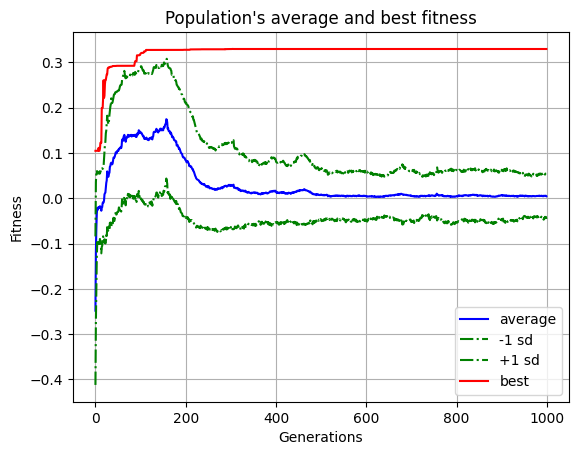

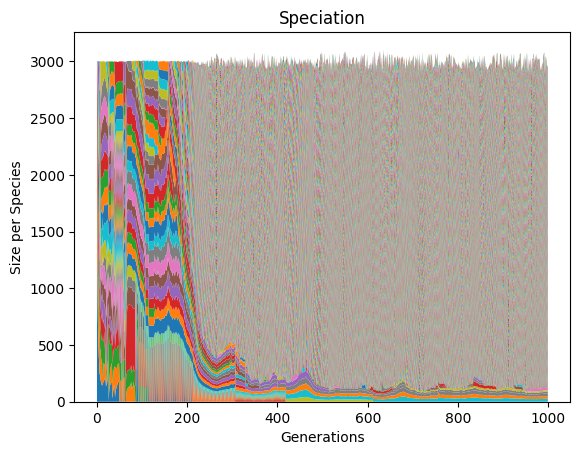

FileNotFoundError: [Errno 2] No such file or directory: 'neat-checkpoint-999'

In [1]:
from pathlib import Path
import neat, visualize
from neat.parallel import ParallelEvaluator
from xor_eval import eval_genome, xor_inputs, xor_outputs   # import from the separate module

checkpointer_frequency = 100
num_workers = 4
num_training_generations = 1000

def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(checkpointer_frequency))

    # Run for up to training generations.
    pe = ParallelEvaluator(num_workers, eval_genome)

    # Run using the ParallelEvaluator’s .evaluate method
    winner = p.run(pe.evaluate, num_training_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nBest genome:\n{!s}'.format(winner))
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        out = winner_net.activate(xi)
        print(f"input {xi}, expected {xo}, got {out}")

    visualize.draw_net(config, winner, view=False)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    # Restore last checkpoint, run 10 more gens
    p = neat.Checkpointer.restore_checkpoint(f'neat-checkpoint-{num_training_generations-1}')
    p.run(pe.evaluate, 10)

if __name__ == "__main__":
    run(Path("./xor_config"))